<center>
    <h1> Programación Científica</h1>
    <h2> Actividad 7 </h2>
    <h2> Felipe Chacón Ossa </h2>
    <h2> 201303017-3 </h2>
</center>

_Mayo 2017_

In [17]:
import numba
import numexpr as ne
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact
from ipywidgets import fixed

En la presente actividad simularemos y visualizaremos un sistema dinámico 2-dimensional simple. Para ello resolveremos una EDO numéricamente, utilizando el _método de Euler_. 

Consideremos un sistema de $N$ partículas $(x_i(t), y_i(t))$ en el dominio $[0,1]\times[0,1]$, cuyo movimiento se rige por las siguientes ecuaciones (EDOs autónomas):

\begin{align}
\frac{dx}{dt} &= \text{tanh}(x^2+y^2), \text{ con } x(0)=x_0, \\
\frac{dy}{dt} &= \text{tanh}(x^2+y^2), \text{ con } y(0)=y_0 \\
\end{align}

El _método de Euler_ para resolver este problema numéricamente, consiste en realizar la siguiente aproximación para la derivada:

\begin{align}
\frac{x_{i+1}-x_i}{\Delta t} =  \text{tanh}(x_i^2+y_i^2) \rightarrow x_{i+1} = x_i + \Delta t \cdot \text{tanh}(x_i^2+y_i^2) \\
\frac{y_{i+1}-y_i}{\Delta t} =  \text{tanh}(x_i^2+y_i^2) \rightarrow y_{i+1} = y_i + \Delta t \cdot \text{tanh}(x_i^2+y_i^2)
\end{align}

ocupando las condiciones iniciales $x_0$ e $y_0$ como puntos de partida. Aquí $\Delta t$ (_time step_) es un parámetro definido por usted, y usualmente toma valores pequeños.

__Notar__ que esta ecuación es válida para una partícula, y por tanto para simular un sistema de $N$ de estas, es necesario realizar esta actualización para cada partícula $(x_i,y_i)$ con $i \in [1,N]$.

__Se solicita que realice lo siguiente__:
1. Genere un conjunto de `100` puntos aleatoriamente distribuidos en el espacio $[0,1]\times[0,1]$ (Seran usados como posiciones iniciales del sistema). Grafíque el conjunto de puntos obtenidos.
2. Realizar un gráfico de la función que define el comportamiento del sistema: $f(z) = \text{tanh}(z^2)$ (gráfico unidimensional).
3. Desarrollar la función `simular(x0, y0, dt, tf)` que reciba los `np.ndarray` con las coordenadas iniciales `x0` e `y0` del sistema, el _time step_ `dt` (seleccione un valor pequeño $\sim 0.01$) y el tiempo final de simulación. Esta función debe graficar el conjunto de puntos del sistema, en su tiempo final.
4. Usando `interact` desarrolle un _widget_ para visualizar interactivamente distintos estados finales del sistema (distintos `tf`).

In [68]:
x = np.random.random(100)
y = np.random.random(100)

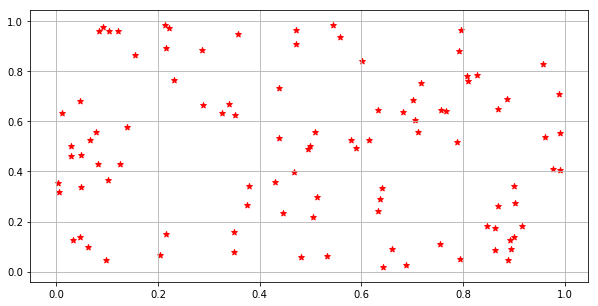

In [69]:
plt.figure(figsize=(10,5))
plt.scatter(x,y, marker='*', color='red')
plt.grid()
plt.show()

In [5]:
def f(z):
    return np.tanh(z**2)

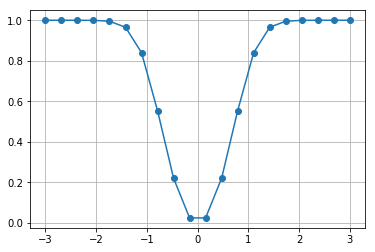

In [6]:
z = np.linspace(-3,3,20)
plt.plot(z, f(z), 'o-')
plt.grid()
plt.show()

In [84]:
def simular(x0, y0, dt, tf):
    
    X0 = np.copy(x0)
    Y0 = np.copy(y0)
    
    for i in range(tf):
        X0 += dt * np.tanh(X0**2 + Y0**2)
        Y0 += dt * np.tanh(X0**2 + Y0**2)
    
    plt.scatter(X0,Y0, marker='*')
    plt.grid()
    plt.show()

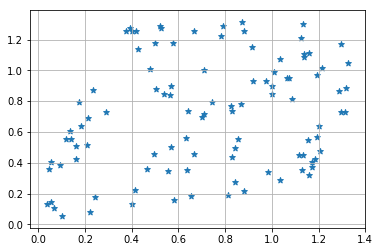

In [88]:
interact(simular, x0=fixed(x), y0=fixed(y), dt=fixed(0.01), tf=(0,100,1))